# Mobile Net

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.applications import MobileNetV3Small
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [79]:
mobile = tf.keras.applications.mobilenet_v2.MobileNetV2()

In [80]:
def prepare_image(file):
    img_path = Path("D:/UCSD_CodeAlong_Cats_Dogs/Data/MobileNet-samples")
    img = image.load_img(str(img_path / file), target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet_v2.preprocess_input(img_array_expanded_dims)

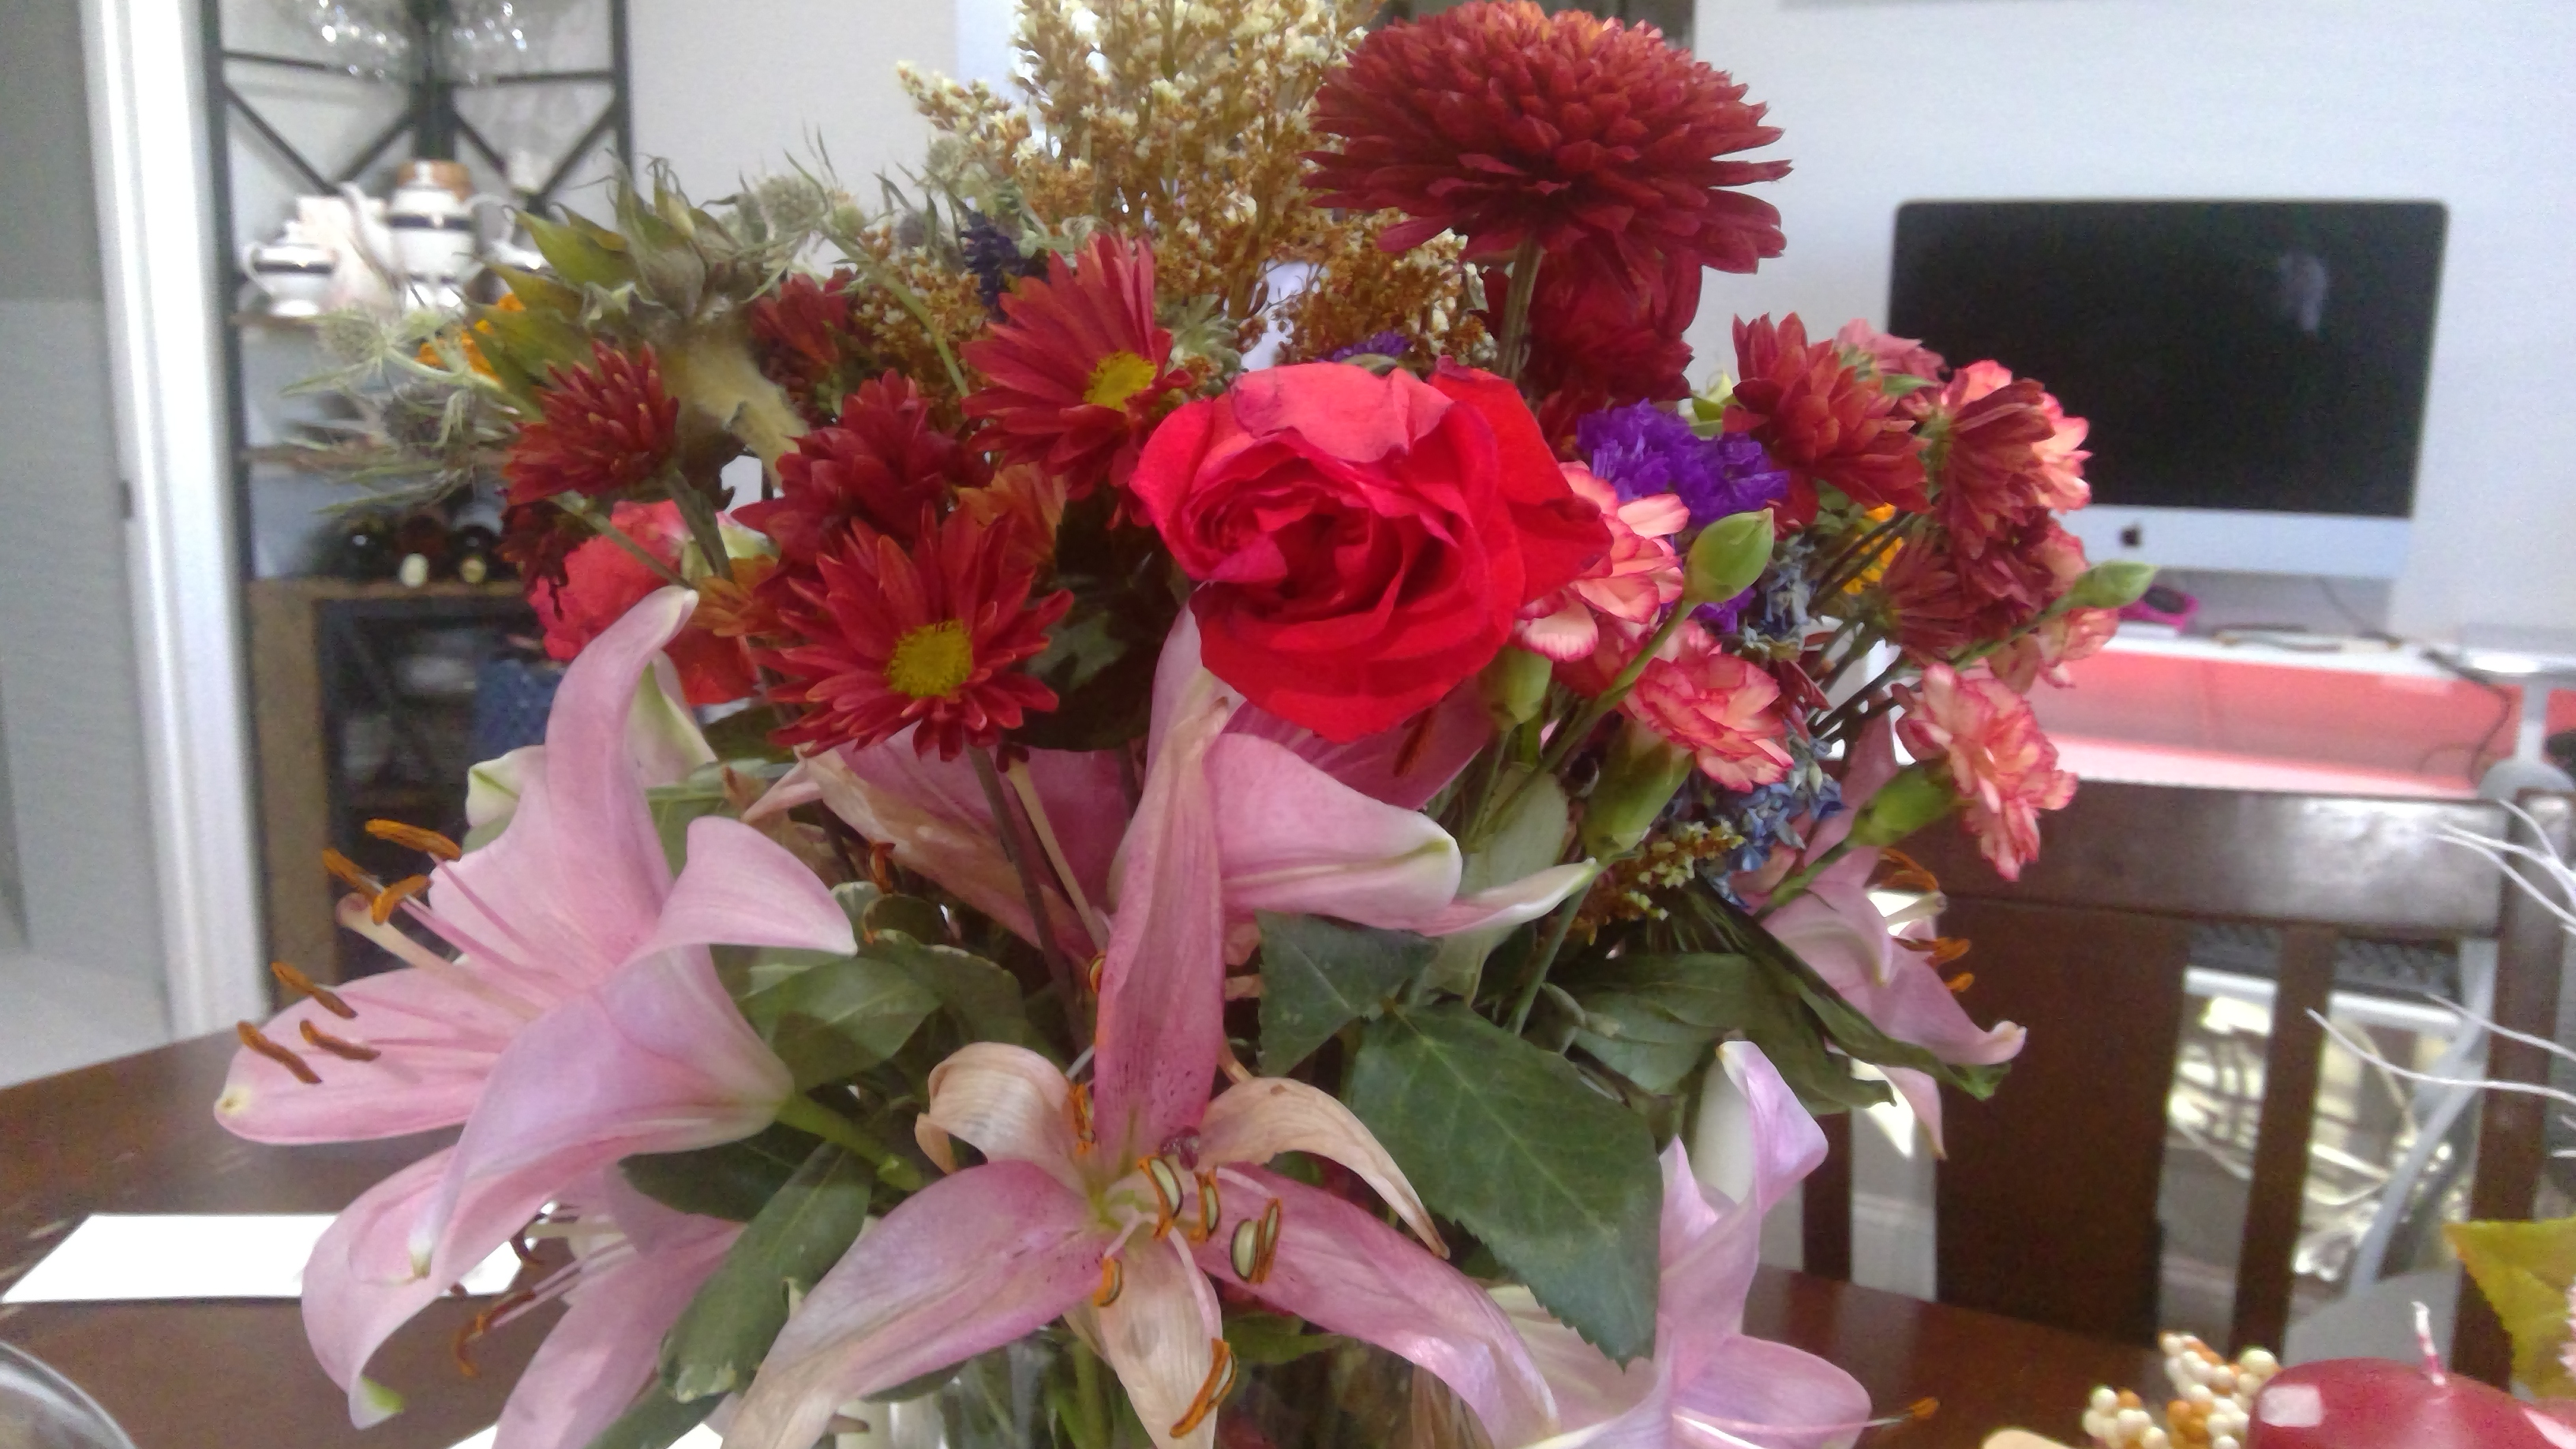

In [81]:
from IPython.display import Image
Image(filename=r"D:\UCSD_CodeAlong_Cats_Dogs\Data\MobileNet-samples\random_obj(1).png", width= 300, height= 200)

In [82]:
preprocessed_image = prepare_image("random_obj(1).png")
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


[[('n03991062', 'pot', 0.30952916),
  ('n04522168', 'vase', 0.1316293),
  ('n03930313', 'picket_fence', 0.036276896),
  ('n02699494', 'altar', 0.030013056),
  ('n03457902', 'greenhouse', 0.023835639)]]

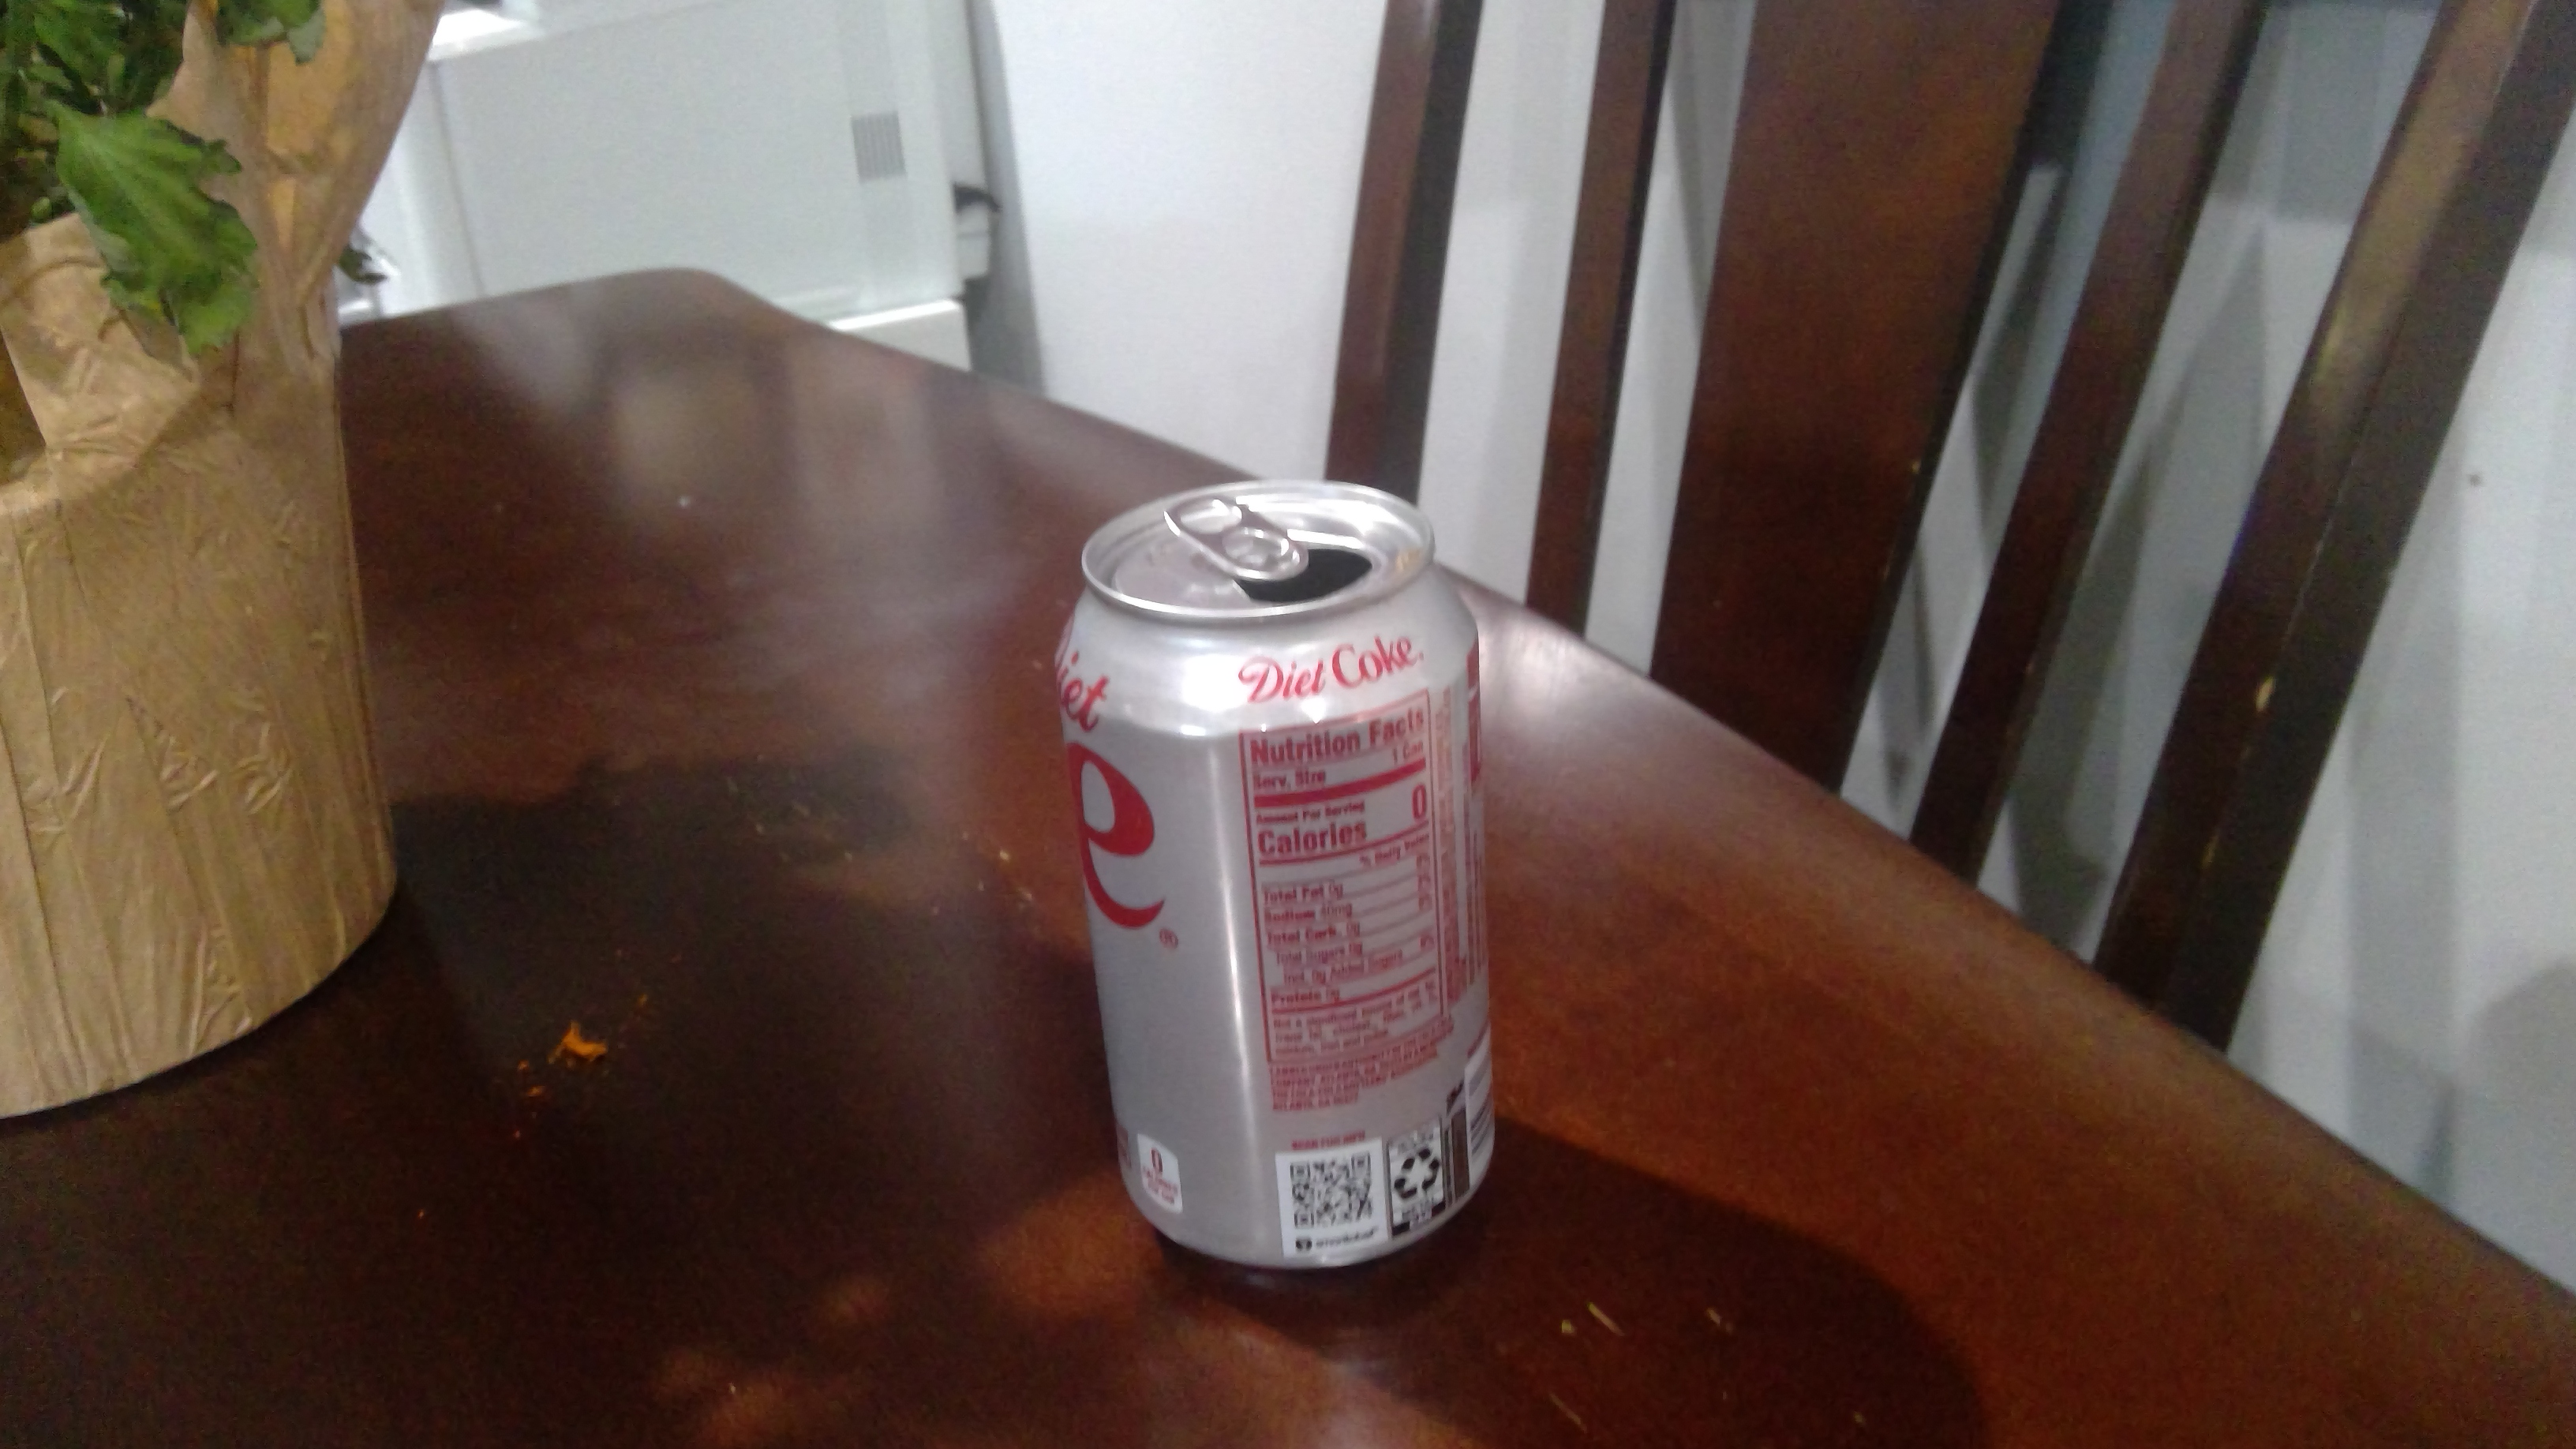

In [83]:
from IPython.display import Image
Image(filename=r"D:\UCSD_CodeAlong_Cats_Dogs\Data\MobileNet-samples\random_obj(2).png", width= 300, height= 200)

In [84]:
preprocessed_image = prepare_image("random_obj(2).png")
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


[[('n03843555', 'oil_filter', 0.3196962),
  ('n03476991', 'hair_spray', 0.20347695),
  ('n03983396', 'pop_bottle', 0.059854787),
  ('n04357314', 'sunscreen', 0.042797234),
  ('n03690938', 'lotion', 0.033215903)]]

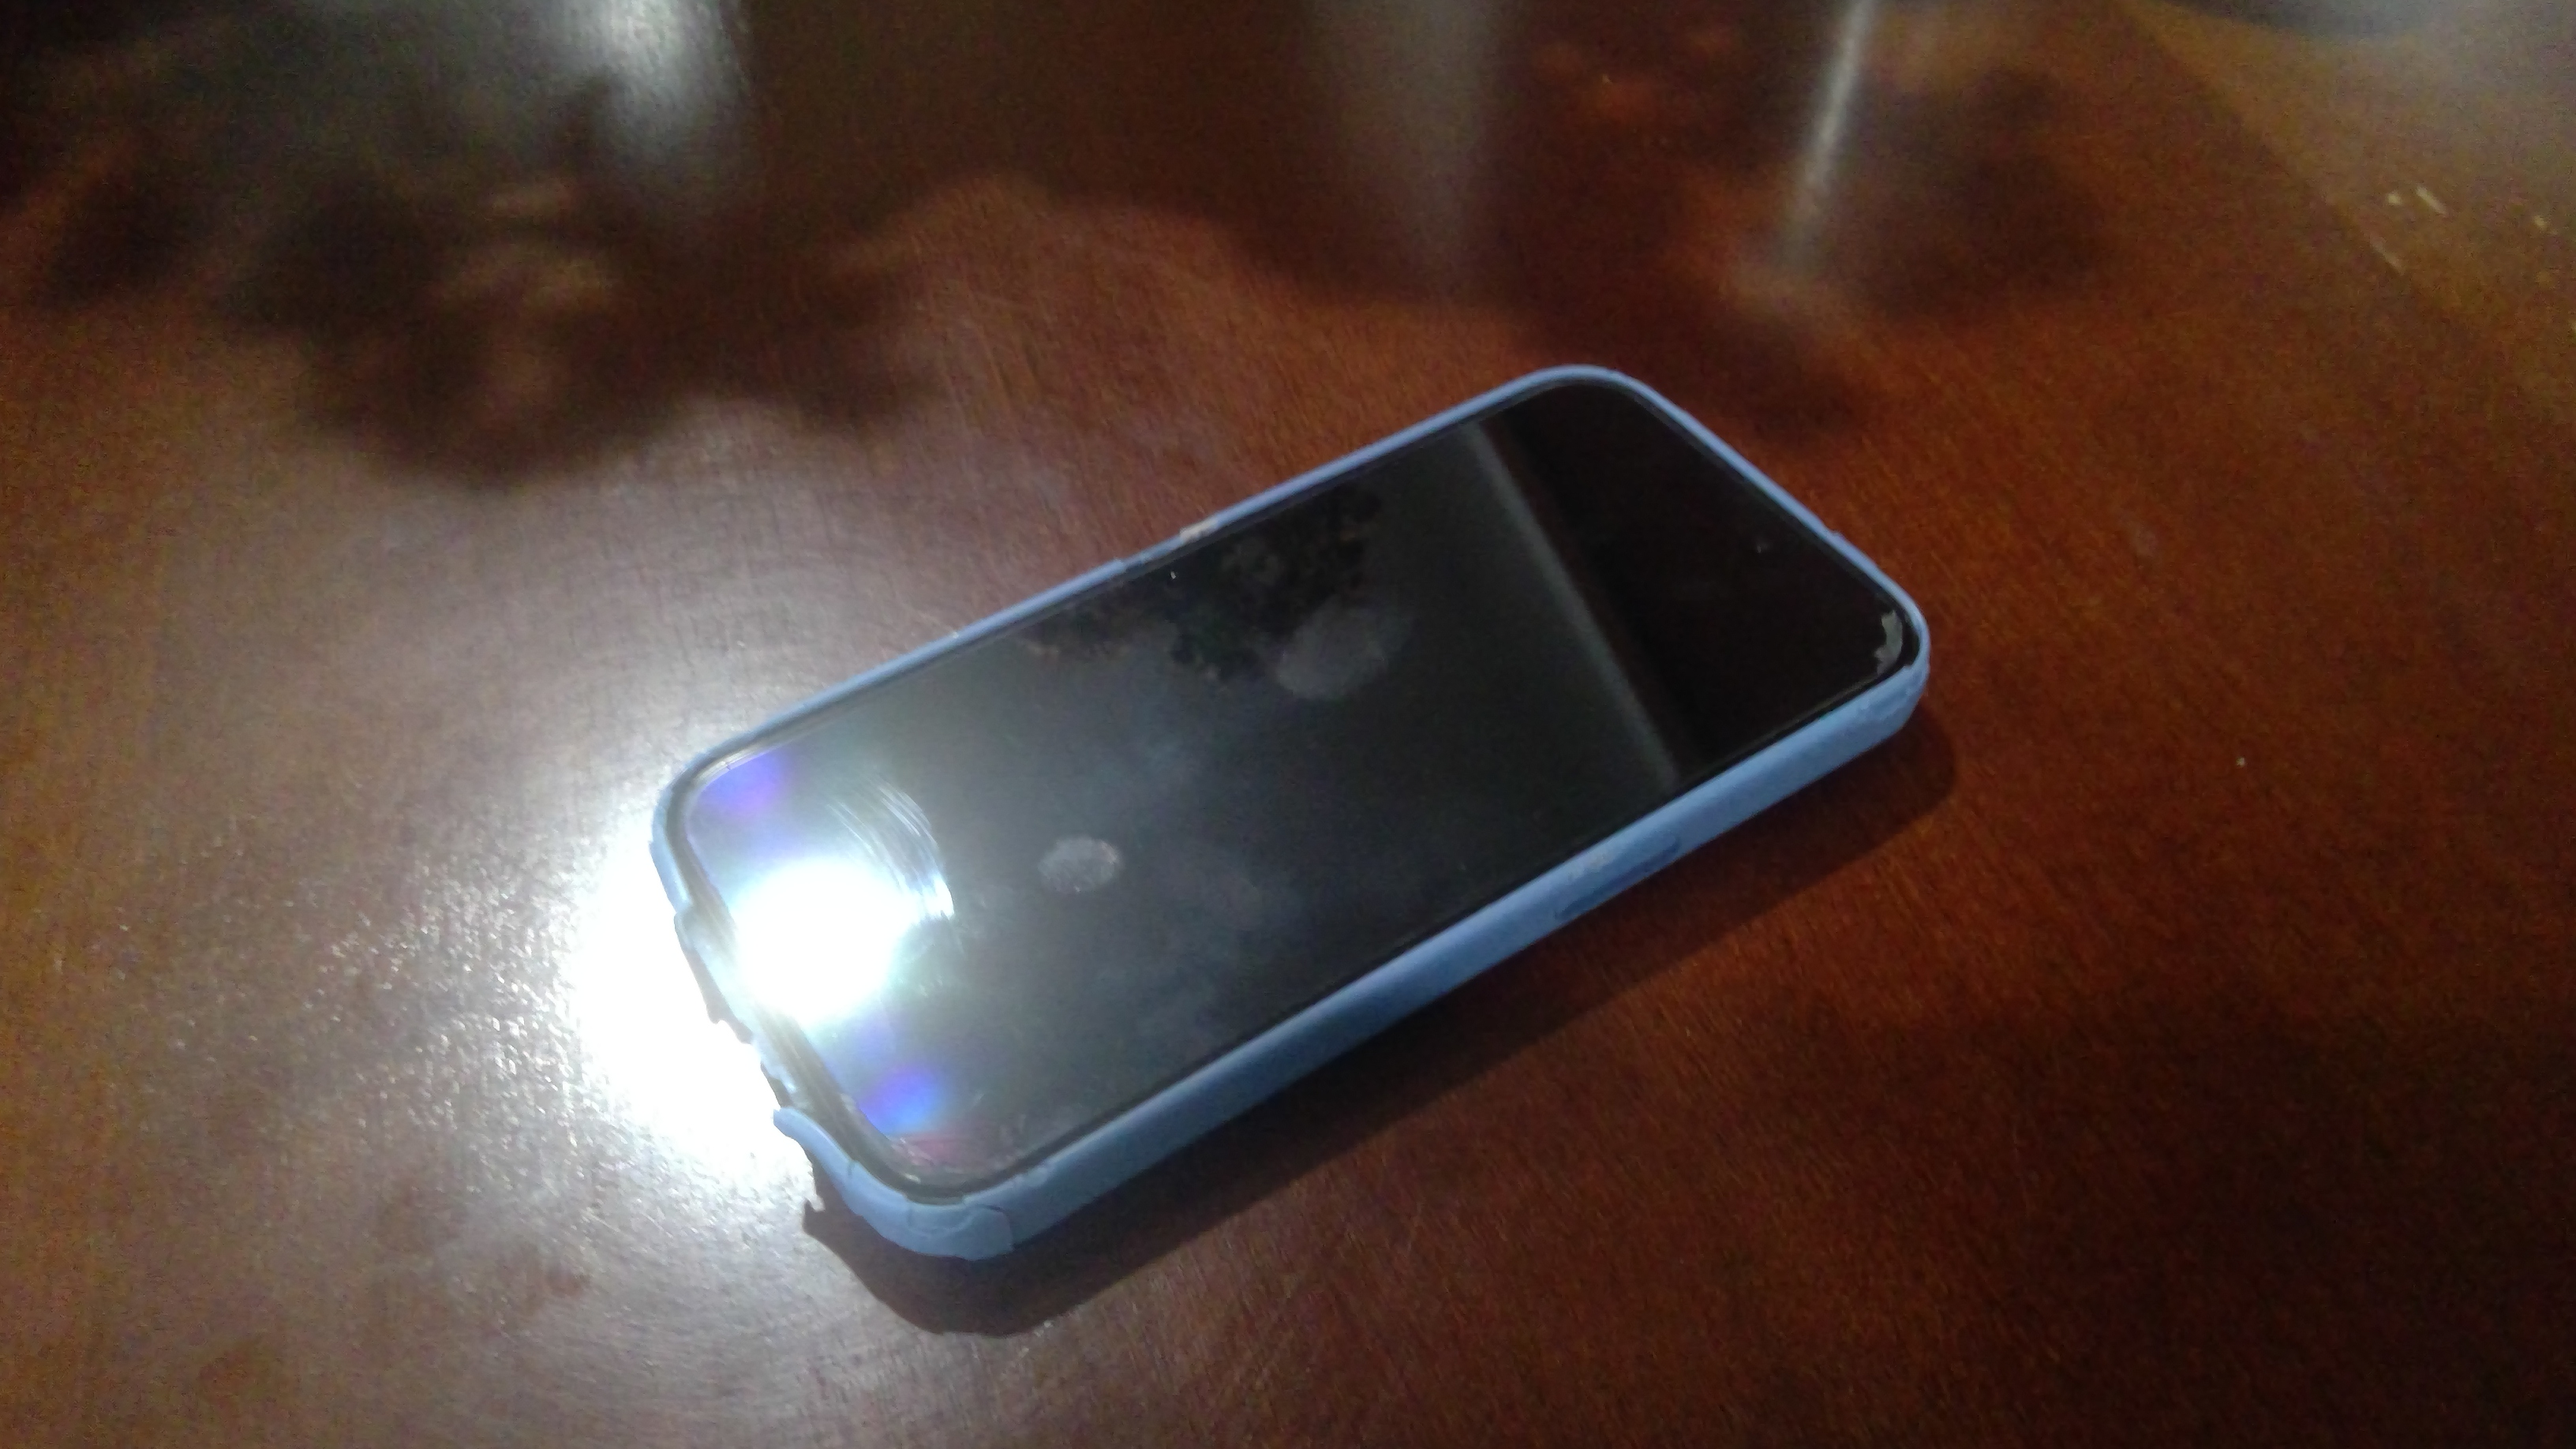

In [85]:
from IPython.display import Image
Image(filename=r"D:\UCSD_CodeAlong_Cats_Dogs\Data\MobileNet-samples\random_obj(3).png", width= 300, height= 200)

In [86]:
preprocessed_image = prepare_image("random_obj(3).png")
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


[[('n02992529', 'cellular_telephone', 0.6580991),
  ('n03584254', 'iPod', 0.23885287),
  ('n03666591', 'lighter', 0.012902016),
  ('n03642806', 'laptop', 0.012865824),
  ('n03777754', 'modem', 0.012660881)]]

## Re-Train on Sign Language Data Set

In [53]:
# Obtain the data
# Mavi, A., (2020), “A New Dataset and Proposed Convolutional Neural Network Architecture for Classification of American Sign Language Digits”, arXiv:2011.08927Mavi, A., (2020), “A New Dataset and Proposed Convolutional Neural Network Architecture for Classification of American Sign Language Digits”, arXiv:2011.08927 [cs.CV]

# Split into train, valid, test dirs
os.chdir(Path(r"D:\UCSD_CodeAlong_Cats_Dogs\Data\sign_language_data"))

if os.path.isdir("train/0/") is False:
  os.mkdir("train")
  os.mkdir("valid")
  os.mkdir("test")
  
  for i in range(0, 10):
    shutil.move(f'{i}', 'train')
    os.mkdir(f'valid/{i}')
    os.mkdir(f'test/{i}')
    
    valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
    
    for j in valid_samples:
      shutil.move(f'train/{i}/{j}', f'valid/{i}')
    
    test_samples = random.sample(os.listdir(f'train/{i}'), 5)
    
    for k in test_samples:
      shutil.move(f'train/{i}/{k}', f'test/{i}')

os.chdir("..")


### Pre-Process

In [61]:
train_path = Path(r"D:\UCSD_CodeAlong_Cats_Dogs\Data\sign_language_data\train")
valid_path = Path(r"D:\UCSD_CodeAlong_Cats_Dogs\Data\sign_language_data\valid")
test_path = Path(r"D:\UCSD_CodeAlong_Cats_Dogs\Data\sign_language_data\test")

In [58]:
dir(tf.keras.applications.mobilenet_v2)

['MobileNetV2',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'decode_predictions',
 'preprocess_input']

In [60]:
dir(ImageDataGenerator)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api_export_path',
 '_api_export_symbol_id',
 'apply_transform',
 'fit',
 'flow',
 'flow_from_dataframe',
 'flow_from_directory',
 'get_random_transform',
 'random_transform',
 'standardize']

In [87]:
train_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(directory= train_path, target_size= (224, 224), batch_size= 10)

valid_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(directory= valid_path, target_size= (224, 224), batch_size= 10)

test_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(directory= test_path, target_size= (224, 224), batch_size= 10, shuffle= False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


### Build and Tune New Model!

In [88]:
mobile = tf.keras.applications.mobilenet_v2.MobileNetV2()

In [ ]:
mobile.summary()

In [ ]:
from tensorflow.keras.layers import Flatten

x = mobile.layers[-6].output
x = Flatten()(x)
output = Dense(units= 10, activation= "softmax")(x)

# this syntax is that of a functional model
# it says to this output layer pass x which is the output of all the previous layers
# Flatten is needed when moving off of a convolutional layer

In [92]:
model = Model(inputs= mobile.input, outputs= output)

In [93]:
for layer in model.layers[:-23]:
  layer.trainable = False

In [94]:
# train the model
model.compile(optimizer= Adam(learning_rate= 0.0001), loss= "categorical_crossentropy", metrics= ["accuracy"])

In [95]:
# More epochs for better results
model.fit(x= train_batches, validation_data= valid_batches, epochs= 15, verbose= 2) 

d:\UCSD_CodeAlong_Cats_Dogs\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
172/172 - 81s - 473ms/step - accuracy: 0.7915 - loss: 0.8080 - val_accuracy: 0.8500 - val_loss: 0.4812
Epoch 2/15
172/172 - 50s - 289ms/step - accuracy: 0.9655 - loss: 0.1194 - val_accuracy: 0.9000 - val_loss: 0.3134
Epoch 3/15
172/172 - 51s - 296ms/step - accuracy: 0.9918 - loss: 0.0261 - val_accuracy: 0.9067 - val_loss: 0.3737
Epoch 4/15
172/172 - 53s - 307ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.9500 - val_loss: 0.1677
Epoch 5/15
172/172 - 54s - 312ms/step - accuracy: 0.9977 - loss: 0.0065 - val_accuracy: 0.9567 - val_loss: 0.1734
Epoch 6/15
172/172 - 54s - 313ms/step - accuracy: 0.9965 - loss: 0.0139 - val_accuracy: 0.9500 - val_loss: 0.1626
Epoch 7/15
172/172 - 54s - 316ms/step - accuracy: 0.9936 - loss: 0.0167 - val_accuracy: 0.9133 - val_loss: 0.2697
Epoch 8/15
172/172 - 54s - 313ms/step - accuracy: 0.9942 - loss: 0.0156 - val_accuracy: 0.9500 - val_loss: 0.2051
Epoch 9/15
172/172 - 58s - 337ms/step - accuracy: 0.9901 - loss: 0.0317 - val_accuracy: 